# Determining Static Equilibrium in NumPy

When analyzing physical structures, it is crucial to understand the mechanics keeping them stable. Applied forces on a floor, a beam, or any other structure, create reaction forces and moments. These reactions are the structure resisting movement without breaking. In cases where structures do not move despite having forces applied to them, [Newton's second law](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion#Newton's_second_law) states that both the acceleration and sum of forces in all directions in the system must be zero. You can represent and solve this concept with NumPy arrays.

## What you'll do:
- In this tutorial, you will use NumPy to create vectors and moments using NumPy arrays
- Solve problems involving cables and floors holding up structures
- Write NumPy matrices to isolate unkowns
- Use NumPy functions to perform linear algebra operations

## What you'll learn:
- How to represent points, vectors, and moments with NumPy.
- How to find the [normal of vectors](https://en.wikipedia.org/wiki/Normal_(geometry))
- Using NumPy to compute matrix calculations

## What you'll need:
- NumPy
- [Matplotlib](https://matplotlib.org/)

imported with the following comands:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this tutorial you will use the following NumPy tools:

* [`np.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) : this function determines the measure of vector magnitude
* [`np.cross`](https://numpy.org/doc/stable/reference/generated/numpy.cross.html) : this function takes two matrices and produces the cross product

## Solving equilibrium with Newton's second law

Your model consists of a beam under a sum of forces and moments. You can start analyzing this system with Newton's second law:

$$\sum{\text{force}} = \text{mass} \times \text{acceleration}.$$

In order to simplify the examples looked at, assume they are static, with acceleration $=0$. Due to our system existing in three dimensions, consider forces being applied in each of these dimensions. This means that you can represent these forces as vectors. You come to the same conclusion for [moments](https://en.wikipedia.org/wiki/Moment_(physics)), which result from forces being applied a certain distance away from an object's center of mass.

Assume that the force $F$ is represented as a three-dimensional vector

$$F = (F_x, F_y, F_z)$$

where each of the three components represent the magnitude of the force being applied in each corresponding direction. Assume also that each component in the vector

$$r = (r_x, r_y, r_z)$$

is the distance between the point where each component of the force is applied and the centroid of the system. Then, the moment can be computed by

$$r \times F = (r_x, r_y, r_z) \times (F_x, F_y, F_z).$$

Start with some simple examples of force vectors

In [2]:
forceA = np.array([1, 0, 0])
forceB = np.array([0, 1, 0])
print("Force A =", forceA)
print("Force B =", forceB)

Force A = [1 0 0]
Force B = [0 1 0]


This defines `forceA` as being a vector with magnitude of 1 in the $x$ direction and `forceB` as magnitude 1 in the $y$ direction.

It may be helpful to visualize these forces in order to better understand how they interact with each other.
Matplotlib is a library with visualization tools that can be utilized for this purpose.
Quiver plots will be used to demonstrate [three dimensional vectors](https://matplotlib.org/3.3.4/gallery/mplot3d/quiver3d.html), but the library can also be used for [two dimensional demonstrations](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.quiver.html).

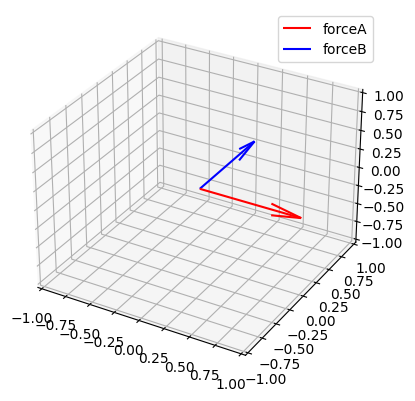

In [3]:
fig = plt.figure()

d3 = fig.add_subplot(projection="3d")

d3.set_xlim(-1, 1)
d3.set_ylim(-1, 1)
d3.set_zlim(-1, 1)

x, y, z = np.array([0, 0, 0])  # defining the point of application.  Make it the origin

u, v, w = forceA  # breaking the force vector into individual components
d3.quiver(x, y, z, u, v, w, color="r", label="forceA")

u, v, w = forceB
d3.quiver(x, y, z, u, v, w, color="b", label="forceB")

plt.legend()
plt.show()

There are two forces emanating from a single point. In order to simplify this problem, you can add them together to find the sum of forces. Note that both `forceA` and `forceB` are three-dimensional vectors, represented by NumPy as arrays with three components. Because NumPy is meant to simplify and optimize operations between vectors, you can easily compute the sum of these two vectors as follows:

In [4]:
forceC = forceA + forceB
print("Force C =", forceC)

Force C = [1 1 0]


Force C now acts as a single force that represents both A and B.
You can plot it to see the result.

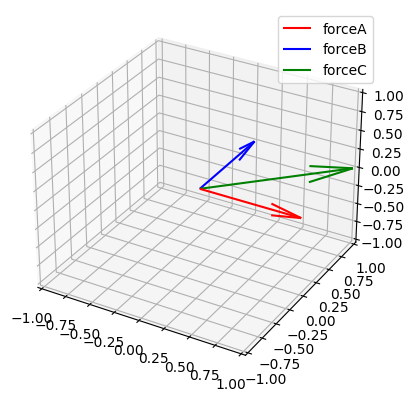

In [5]:
fig = plt.figure()

d3 = fig.add_subplot(projection="3d")

d3.set_xlim(-1, 1)
d3.set_ylim(-1, 1)
d3.set_zlim(-1, 1)

x, y, z = np.array([0, 0, 0])

u, v, w = forceA
d3.quiver(x, y, z, u, v, w, color="r", label="forceA")
u, v, w = forceB
d3.quiver(x, y, z, u, v, w, color="b", label="forceB")
u, v, w = forceC
d3.quiver(x, y, z, u, v, w, color="g", label="forceC")

plt.legend()
plt.show()

However, the goal is equilibrium.
This means that you want your sum of forces to be $(0, 0, 0)$ or else your object will experience acceleration.
Therefore, there needs to be another force that counteracts the prior ones.

You can write this problem as $A+B+R=0$, with $R$ being the reaction force that solves the problem.

In this example this would mean:

$$(1, 0, 0) + (0, 1, 0) + (R_x, R_y, R_z) = (0, 0, 0)$$

Broken into $x$, $y$, and $z$ components this gives you:

$$\begin{cases}
1+0+R_x=0\\
0+1+R_y=0\\
0+0+R_z=0
\end{cases}$$

solving for $R_x$, $R_y$, and $R_z$ gives you a vector $R$ of $(-1, -1, 0)$.


If plotted, the forces seen in prior examples should be nullified.
Only if there is no force remaining is the system considered to be in equilibrium.

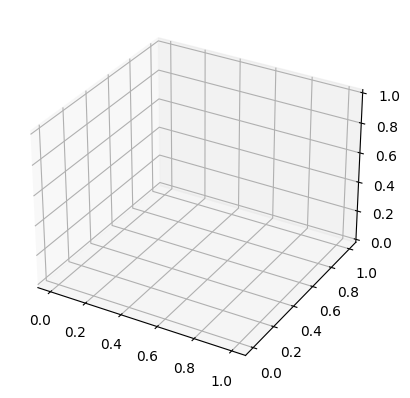

In [6]:
R = np.array([-1, -1, 0])

fig = plt.figure()

d3.set_xlim(-1, 1)
d3.set_ylim(-1, 1)
d3.set_zlim(-1, 1)

d3 = fig.add_subplot(projection="3d")

x, y, z = np.array([0, 0, 0])

u, v, w = forceA + forceB + R  # add them all together for sum of forces
d3.quiver(x, y, z, u, v, w)

plt.show()

The empty graph signifies that there are no outlying forces. This denotes a system in equilibrium.


## Solving Equilibrium as a sum of moments

Next let's move to a more complicated application.
When forces are not all applied at the same point, moments are created.

Similar to forces, these moments must all sum to zero, otherwise rotational acceleration will be experienced.  Similar to the sum of forces, this creates a linear equation for each of the three coordinate directions in space.

A simple example of this would be from a force applied to a stationary pole secured in the ground.
The pole does not move, so it must apply a reaction force.
The pole also does not rotate, so it must also be creating a reaction moment.
Solve for both the reaction force and moments.

Lets say a 5N force is applied perpendicularly 2m above the base of the pole.

In [7]:
f = 5  # Force in newtons
L = 2  # Length of the pole

R = 0 - f
M = 0 - f * L
print("Reaction force =", R)
print("Reaction moment =", M)

Reaction force = -5
Reaction moment = -10


## Finding values with physical properties

Let's say that instead of a force acting perpendicularly to the beam, a force was applied to our pole through a wire that was also attached to the ground.
Given the tension in this cord, all you need to solve this problem are the physical locations of these objects.

![Image representing the problem](_static/static_eqbm-fig01.png)

In response to the forces acting upon the pole, the base generated reaction forces in the x and y directions, as well as a reaction moment.

Denote the base of the pole as the origin.
Now, say the cord is attached to the ground 3m in the x direction and attached to the pole 2m up, in the z direction.

Define these points in space as NumPy arrays, and then use those arrays to find directional vectors.

In [8]:
poleBase = np.array([0, 0, 0])
cordBase = np.array([3, 0, 0])
cordConnection = np.array([0, 0, 2])

poleDirection = cordConnection - poleBase
print("Pole direction =", poleDirection)
cordDirection = cordBase - cordConnection
print("Cord direction =", cordDirection)

Pole direction = [0 0 2]
Cord direction = [ 3  0 -2]


In order to use these vectors in relation to forces you need to convert them into unit vectors.
Unit vectors have a magnitude of one, and convey only the direction of the forces.

In [9]:
cordUnit = cordDirection / np.linalg.norm(cordDirection)
print("Cord unit vector =", cordUnit)

Cord unit vector = [ 0.83205029  0.         -0.5547002 ]


You can then multiply this direction with the magnitude of the force in order to find the force vector.

Let's say the cord has a tension of 5N:

In [10]:
cordTension = 5
forceCord = cordUnit * cordTension
print("Force from the cord =", forceCord)

Force from the cord = [ 4.16025147  0.         -2.77350098]


In order to find the moment you need the cross product of the force vector and the radius.

In [11]:
momentCord = np.cross(forceCord, poleDirection)
print("Moment from the cord =", momentCord)

Moment from the cord = [ 0.         -8.32050294  0.        ]


Now all you need to do is find the reaction force and moment.

In [12]:
equilibrium = np.array([0, 0, 0])
R = equilibrium - forceCord
M = equilibrium - momentCord
print("Reaction force =", R)
print("Reaction moment =", M)

Reaction force = [-4.16025147  0.          2.77350098]
Reaction moment = [0.         8.32050294 0.        ]


### Another Example
Let's look at a slightly more complicated model.  In this example you will be observing a beam with two cables and an applied force.  This time you need to find both the tension in the cords and the reaction forces of the beam. *(Source: [Vector Mechanics for Engineers: Statics](https://www.mheducation.com/highered/product/vector-mechanics-engineers-statics-beer-johnston/M9780077687304.html), Problem 4.106)*


![image.png](_static/problem4.png)

Define distance *a* as 3 meters


As before, start by defining the location of each relevant point as an array.

In [13]:
A = np.array([0, 0, 0])
B = np.array([0, 3, 0])
C = np.array([0, 6, 0])
D = np.array([1.5, 0, -3])
E = np.array([1.5, 0, 3])
F = np.array([-3, 0, 2])

From these equations, you start by determining vector directions with unit vectors.

In [14]:
AB = B - C
AC = C - A
BD = D - B
BE = E - B
CF = F - C

UnitBD = BD / np.linalg.norm(BD)
UnitBE = BE / np.linalg.norm(BE)
UnitCF = CF / np.linalg.norm(CF)

RadBD = np.cross(AB, UnitBD)
RadBE = np.cross(AB, UnitBE)
RadCF = np.cross(AC, UnitCF)

This lets you represent the tension (T) and reaction (R) forces acting on the system as

$$\left[
\begin{array}
~1/3 & 1/3 & 1 & 0 & 0\\
-2/3 & -2/3 & 0 & 1 & 0\\
-2/3 & 2/3 & 0 & 0 & 1\\
\end{array}
\right]
\left[
\begin{array}
~T_{BD}\\
T_{BE}\\
R_{x}\\
R_{y}\\
R_{z}\\
\end{array}
\right]
=
\left[
\begin{array}
~195\\
390\\
-130\\
\end{array}
\right]$$

and the moments as

$$\left[
\begin{array}
~2 & -2\\
1 & 1\\
\end{array}
\right]
\left[
\begin{array}
~T_{BD}\\
T_{BE}\\
\end{array}
\right]
=
\left[
\begin{array}
~780\\
1170\\
\end{array}
\right]$$

Where $T$ is the tension in the respective cord and $R$ is the reaction force in a respective direction. Then you just have six equations:


$\sum F_{x} = 0 = T_{BE}/3+T_{BD}/3-195+R_{x}$

$\sum F_{y} = 0 = (-\frac{2}{3})T_{BE}-\frac{2}{3}T_{BD}-390+R_{y}$

$\sum F_{z} = 0 = (-\frac{2}{3})T_{BE}+\frac{2}{3}T_{BD}+130+R_{z}$

$\sum M_{x} = 0 = 780+2T_{BE}-2T_{BD}$

$\sum M_{z} = 0 = 1170-T_{BE}-T_{BD}$


You now have five unknowns with five equations, and can solve for:

$\ T_{BD} = 780N$

$\ T_{BE} = 390N$

$\ R_{x} = -195N$

$\ R_{y} = 1170N$

$\ R_{z} = 130N$

## Wrapping up

You have learned how to use arrays to represent points, forces, and moments in three dimensional space. Each entry in an array can be used to represent a physical property broken into directional components. These can then be easily manipulated with NumPy functions.

### Additional Applications

This same process can be applied to kinetic problems or in any number of dimensions. The examples done in this tutorial assumed three dimensional problems in static equilibrium. These methods can easily be used in more varied problems. More or less dimensions require larger or smaller arrays to represent. In systems experiencing acceleration, velocity and acceleration can be similarly be represented as vectors as well.

### References

1. [Vector Mechanics for Engineers: Statics (Beer & Johnston & Mazurek)](https://www.mheducation.com/highered/product/vector-mechanics-engineers-statics-beer-johnston/M9780077687304.html)
2. [NumPy Reference](https://numpy.org/doc/stable/reference/)